In [223]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import random as r
from datetime import datetime
import requests

AI Usage: 

concatenate function: For question 3, I used AI to figure out how I can create a data frame even though the columns have a different number of rows for the same time period. I asked AI for possible functions I could use and it showed me the concatenate function and an example on its usage. From there I used online documentation from pandas to understand how to implement the function. After some trial an error I was able to figure it out. 

plt.tight_layout(pad=7.0): My graphs were basically overlapping vertically so the x axis label and the title would almost merge so I used AI to find a function on how to spread them out vertically. It showed me the tight_layout function that seperates the space between each graph. I used this to seperate the graphs and make it look cleaner. 

Cross-Listed Stocks


%%latex
\newpage
```

## Objectives
At the end of the assignment, you will:
* Be able to extract data using the APIs such as `yfinance`
* Be able read in and process data from`.csv` files
* Create subplots of data using `matplotlib`
* Understand how the exchange rates between two countries affects stocks cross-listed in both country’s stock exchange

Data
1.	**Yahoo Finance:** This is where we expect the majority of the stock data to come from. You can use the Python library, `yfinance`, to extract the data.
2.	**Cross Listed Companies:** We have provided you with a file `inter-listed.csv`. This in combination with `yfinance` will provide you with all the information needed for stock exchange data.

**Language:** Python 

**Libraries Allowed:** pandas, numpy, matplotlib, datetime, yfinance (and any library required to get exchange rate data)

## Retrieve your ticker below
We have written a function below to retrieve a ticker for you. This is what the marker will expect to be marking your assignment with so do not modify the function. For those that are interested in how the function works, we have written line-by-line explanations to explain. 

In [451]:
# DO NOT MODIFY
def get_ticker_from_student_id(id):
#   get_ticker_from_student_id generates a pseudo-random ticker given a student id
#   :param id: student id (number)
#   :return: ticker (string)

    r.seed(id)
#   a seed will make the generate pseudo-random, meaning the same id will always generate the same ticker
    
    cross_listed_tickers = pd.read_csv('cross_listed_tickers.csv')
#   read in the list of tickers as a pandas dataframe
    
    range = len(cross_listed_tickers.index) - 1
#   get the range of the dataframe, which tells us the max value we can generate

    generated_index = r.randint(0, range)
#   leverage the python random library to generate a value between 0 and the range (note that a seed is defined earlier)

    generated_ticker = cross_listed_tickers.iloc[generated_index, 0]
#   grab the generated ticker off of the dataframe using the integer location method

    return generated_ticker

**Replace YOUR_STUDENT_ID_HERE with the your student id here to get ticker**

In [453]:
# ENTER STUDENT ID HERE
ticker_str = get_ticker_from_student_id(21133829)
print(ticker_str)

# DO NOT MODIFY
start_date = '2022-01-01'
end_date = '2023-01-01'

NDM.TO


In [455]:
# changed due to low volume 
# Professor Thompson agreed on October 10th 2024 that I should switch to a different stock 
# BMO.TO

## Q1
Now that each of you have been assigned a company listed on the TSX and its ticker (`ticker_str`), you will be using this company/ticker throughout the rest of your assignment **(make sure to test it with other tickers to ensure the dynamic criteria is met)**. Extract the following data on your company from `yfinance` using the TSX and store them in a `pandas` DataFrame.
* Company Name (name)
* Domestic Ticker (domestic_ticker)
* Industry (industry)
* Sector (sector)
* Website (website)
* Location (location) - in the format of `'city, state, country'`
* Domestic Stock Exchange (domestic_exchange)

Extract the following information by using the file `interlisted-companies.csv`
* Foreign Stock Exchange (foreign_exchange)

Extract the following information using both the `csv file and yfinance`
* Foreign Ticker (foreign_ticker) 

**For each set of information, the column name for the DataFrame is in brackets.**

**Restrictions:** Do not create your DataFrame by reading an external file not listed above (i.e. .csv or .txt file) in this question.

In [457]:
# Starting parameters 
ticker = 'BMO.TO'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Getting local stock data 
ticker_TO = yf.Ticker(ticker)

# Setting Variables to stock data
name = ticker_TO.info['longName']
domestic_ticker = ticker_TO.info['symbol']
industry = ticker_TO.info['industry']
sector = ticker_TO.info['sector']
website = ticker_TO.info['website']
domestic_exchange = ticker_TO.info['exchange']

# Finding location 
city = ticker_TO.info['city']
state = ticker_TO.info['state']
country = ticker_TO.info['country']
location = [[city, state, country]]

# Foreign Information 

# getting data from the csv file
foreign_data = pd.read_csv('interlisted-companies.csv', index_col = 'Name')

# Using .loc to find the exact row and column of the name
foreign_exchange = foreign_data.loc[name, 'International Market']
foreign_ticker = foreign_data.loc[name, 'US Symbol']

# Creating Data Frame:

# Dictionary with information
info = {'name' : name,
        'domestic_ticker' : domestic_ticker,
        'industry' : industry,
        'sector' : sector,
        'website' : website,
        'location' : location,
        'domestic_exchange' : domestic_exchange,
        'foreign_exchange' : foreign_exchange,
        'foreign_ticker' : foreign_ticker}

# Data frame with the stock name as the index
stock_info = pd.DataFrame(info)
stock_info.set_index('name')

# Print data frame
stock_info

,name,domestic_ticker,industry,sector,website,location,domestic_exchange,foreign_exchange,foreign_ticker
0,Bank of Montreal,BMO.TO,Banks - Diversified,Financial Services,https://www.bmo.com,"[Montreal, QC, Canada]",TOR,NYSE,BMO


In [17]:
%%latex
\newpage


<IPython.core.display.Latex object>

## Q2
Using the yfinance api, extract the exchange data between USD and CAD (aka 1 CAD = ? USD). Store this data in another DataFrame. **Display the first five values of this DataFrame**.

We will use the data from the `start_date` and `end_date` listed above.


**note:** The ticker for this exchange rate is CADUSD=x. This is similar to extracting data for a stock ticker.

### Exchange Rate Data

In [459]:
# Getting the exchange rate data 
CAD_to_USD_rate = yf.Ticker('CADUSD=x')

# Creating the data frame and setting a time period
rate_data = CAD_to_USD_rate.history(start=start_date, end=end_date)
rate_data.index = rate_data.index.strftime('%Y-%m-%d')

# making a data frame for only the close price
exchange_rate = Ex_rate[['Close']]

# printing data frame
exchange_rate.head()

,Close
Date,
2022-01-03,0.789964
2022-01-04,0.784234
2022-01-05,0.787129
2022-01-06,0.783693
2022-01-07,0.785534


In [20]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q3
### a)
Create a 4x1 subplot using matplotlib that will visualize some interesting data.  First and second, the **CLOSING** stock price of your company (both domestic and foreign market stock) over the same time period.  Third, you want to form a graph which will look at the difference between the two in a specific way: you are to graph out the USD price from the US side, divided by the CAD price from the CAD side for date over the same time period as above.  Finally, you are to visualize the exchange from your two countries over the same period as was specified for the exchange rate data.  Make sure that **all four graphs share the same x-axis**. For the x-axis, display the date **every three months** (i.e., Jan 2021, Apr 2021, July 2021, and Oct 2021). Please include descriptive titles on your graphs. 

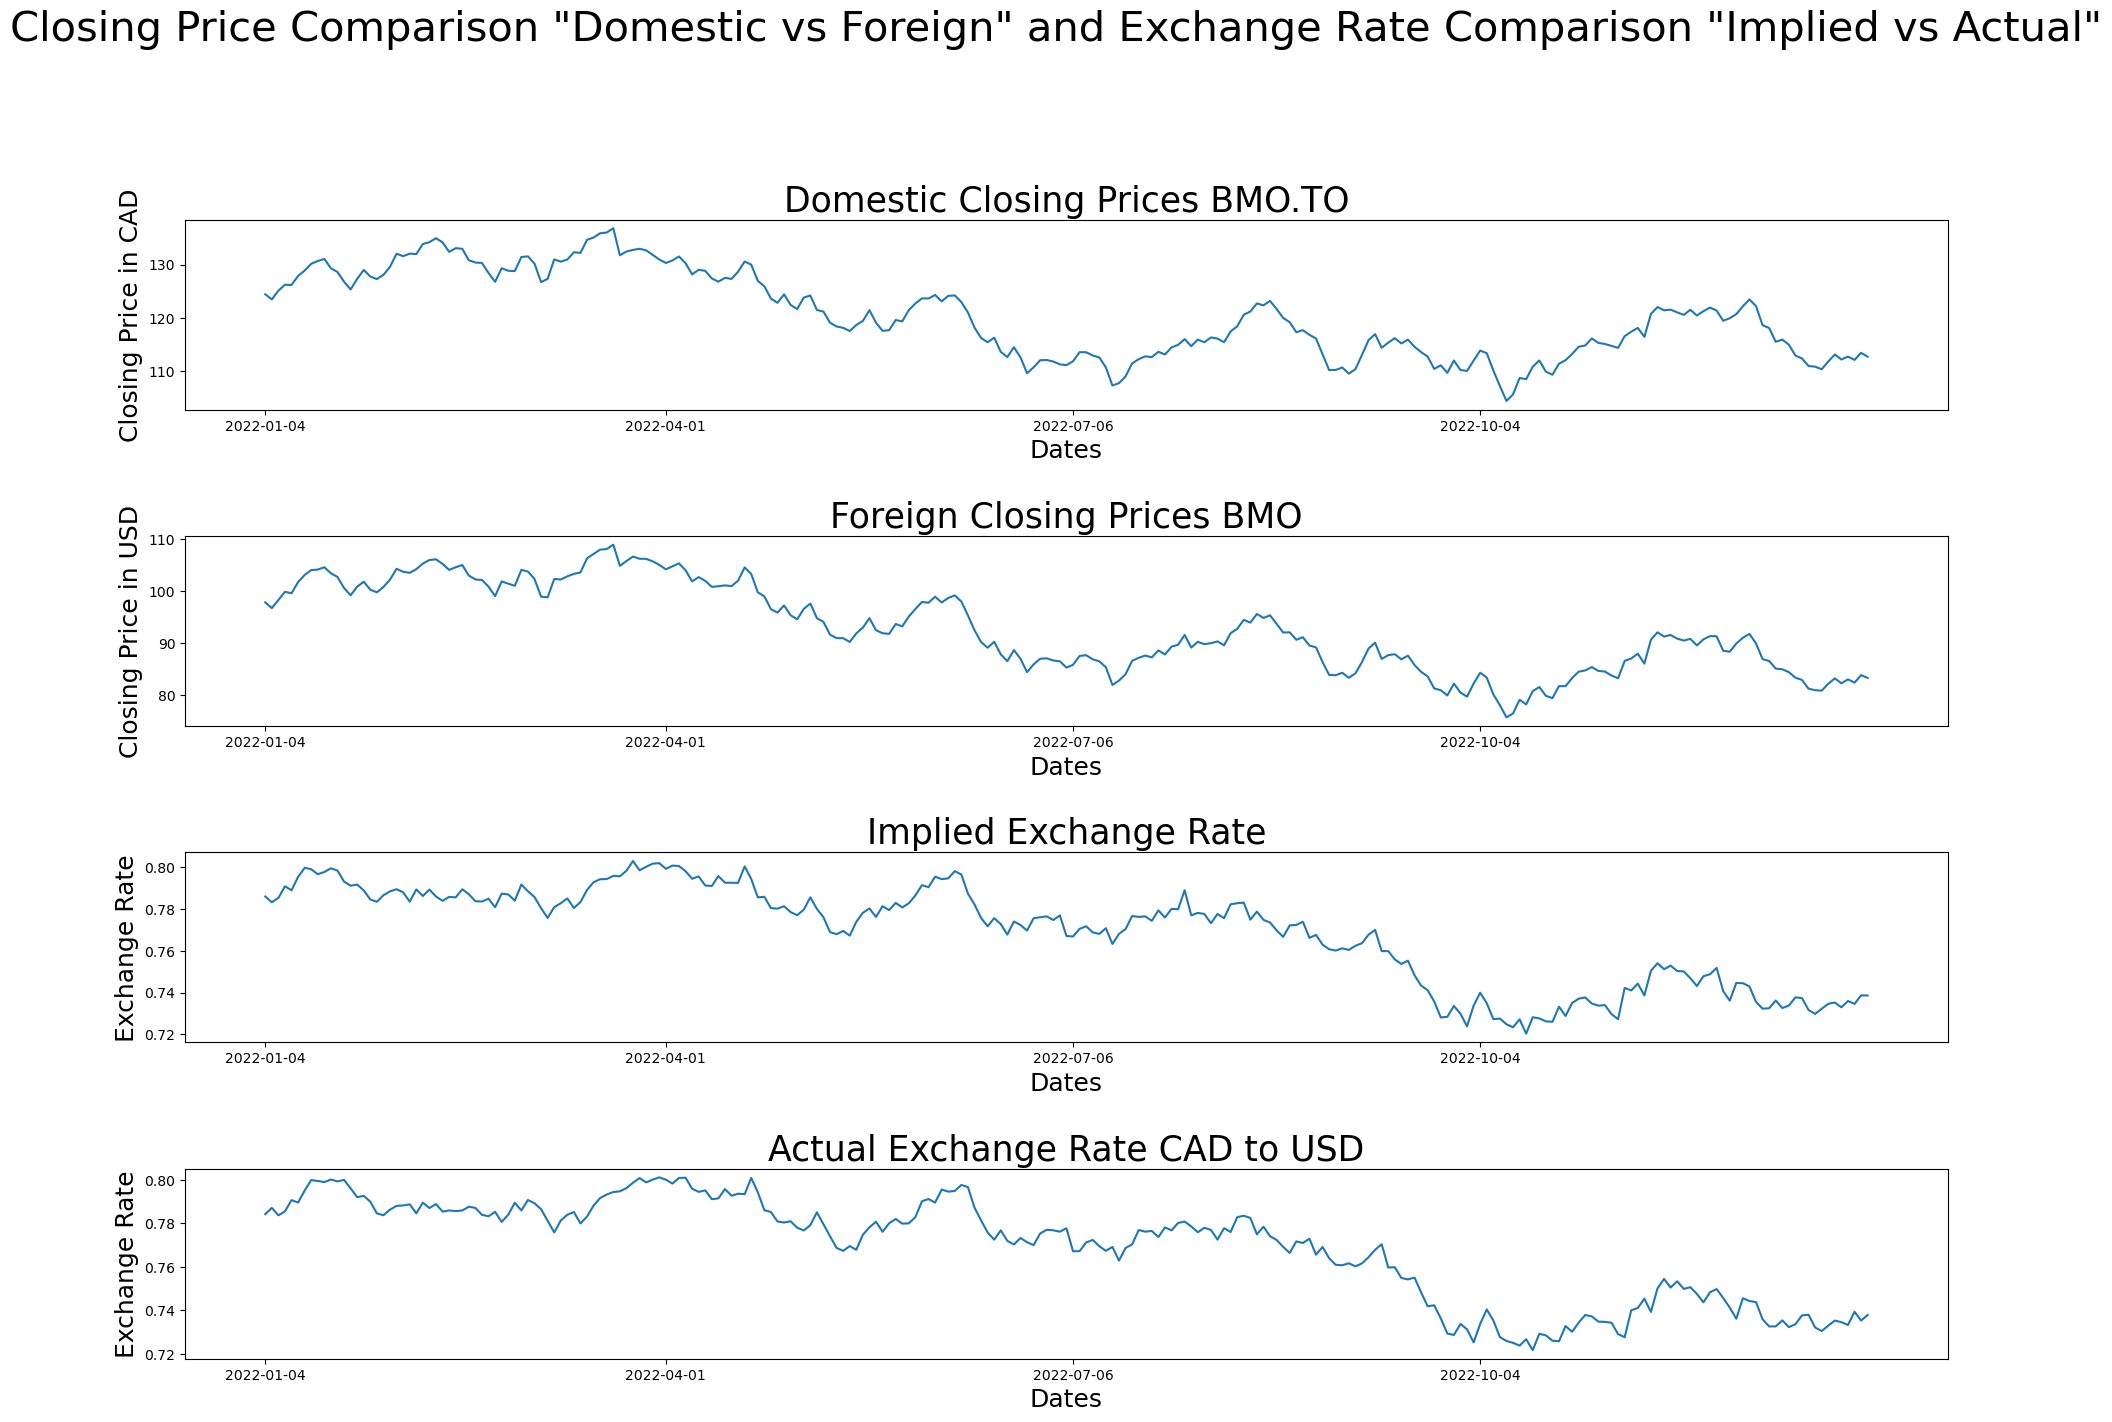

In [461]:
# Creating a data frame for the local ticker's stock info
ticker_TO_hist = ticker_TO.history(start=start_date, end=end_date)
ticker_TO_hist.index = ticker_TO_hist.index.strftime('%Y-%m-%d')

# Creating a data frame for the foreign ticker's stock info
ticker_US = yf.Ticker(foreign_ticker) 
ticker_US_hist = ticker_US.history(start=start_date, end=end_date)
ticker_US_hist.index = ticker_US_hist.index.strftime('%Y-%m-%d')

# Creating a dictionary for the data we will plot on the 4 graphs
graph_dict= { ticker : ticker_TO_hist['Close'],
              foreign_ticker : ticker_US_hist ['Close'] ,
              'difference' : ticker_US_hist ['Close']/ticker_TO_hist['Close'],
              'exchange_rate' : exchange_rate}

# making a data frame with all the data
# The concat function makes the data frame index the same for all 4 columns and fills in all missing values with NaN or null values
graphs = pd.concat(graph_dict, axis=1) #cited AI usage

# .dropna removes all rows with null values in the difference column 
# this takes into account trading days that may occur in Toronto markets but not NYSE markets and 
# Vice versa due to trading holidays
graphs.dropna(subset=[('difference', 'Close')], inplace=True)


# Plotting graphs
fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1) # Makes 4 by 1 subplots
fig.suptitle('Closing Price Comparison "Domestic vs Foreign" and Exchange Rate Comparison "Implied vs Actual"', fontsize = 30) # Main title of graphs
fig.set_size_inches(20, 15) # Makes size of each subplot
custom_dates = ['2022-01-04', '2022-04-01', '2022-07-06','2022-10-04'] # Dates for x axis
plt.tight_layout(pad=7.0) # seperates space between graphs (cited AI usage)



# Subplot 1 (Candian stock close prices)
ax1.plot(graphs.index, graphs[ticker]) 
ax1.set_title ('Domestic Closing Prices ' + (ticker), fontsize=25)
ax1.set_xlabel('Dates', fontsize=18)
ax1.set_ylabel('Closing Price in CAD', fontsize=18)
ax1.set_xticks(custom_dates)

# Subplot 2 (American stock close price)
ax2.plot(graphs.index, graphs[foreign_ticker])
ax2.set_title('Foreign Closing Prices ' + (foreign_ticker), fontsize=25)
ax2.set_xlabel('Dates', fontsize=18)
ax2.set_ylabel('Closing Price in USD', fontsize=18)
ax2.set_xticks(custom_dates)

# Subplot 3 (Implied Exchange rate graph, Canadian stock price/American stock price)
ax3.plot(graphs.index, graphs['difference'])
ax3.set_title('Implied Exchange Rate', fontsize=25)
ax3.set_xlabel('Dates', fontsize=18)
ax3.set_ylabel('Exchange Rate', fontsize=18)
ax3.set_xticks(custom_dates)

# Subplot 4 (Actual Exchange rate graph, CAD to USD)
ax4.plot(graphs.index, graphs['exchange_rate'])
ax4.set_title('Actual Exchange Rate CAD to USD', fontsize=25)
ax4.set_xlabel('Dates', fontsize=18)
ax4.set_ylabel('Exchange Rate', fontsize=18) 
ax4.set_xticks(custom_dates)

In [23]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b)
Compare the plots that you created of your closing price for both markets, what do you notice? Are you able to detect a relationship between the exchange rate graph and the two price plots? Can you see any relationship to any of the graphs with the graph that was derived from divding the US side and CAD side?  **Briefly discuss these questions** 

1. Compare the plots that you created of your closing price for both markets, what do you notice?
The graphs for the closing prices from the Canadian side versus the American side are pretty much identical. The peaks and troughs of the graphs happen on the same days and any changes in price seem to be reflected the same on both. The only difference being the actual closing price on that day since the first graph is in CAD and the second is in USD. This shows that there is a strong correlation between the 2 markets which is expected for the same stock traded in different currencies 

2.  Are you able to detect a relationship between the exchange rate graph and the two price plots?
When comparing the exchange rate graph with the CAD and USD clsoing prices, the changes in the exchange rate directly effect the stock prices in the way they increase and decrease. For example, when the exchange rate increases, the CAD price tends to increase more significantly than the USD price. When the exchange rate decreases, the relative difference between CAD and USD tends to shrink.

3. Can you see any relationship to any of the graphs with the graph that was derived from divding the US side and CAD side?
The third graph has a close relationship with the fourth graph. The third graph is the implied exchange rate which shows the ratio of the two stock prices. As expected, the exchange rate and implied exchange rate graphs are very similar.

In [26]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q4


### a)
Convert USD stock prices to CAD stock prices using the appropriate day’s exchange rate. We will call this the *implied closing price.* For this part, you want to end up with a DataFrame that has the `USD Close price, the exchange rate, the CAD Implied close price, and the CAD actual close price`. **Display the first five values of this dataFrame**. 

In [464]:
# Make a new data frame with USD Close price, the exchange rate, the CAD implied close price, and the CAD Actual Price

Implied_close = graphs[[foreign_ticker, 'exchange_rate', ticker]] # calling columns from the pervious question
Implied_close['Cad Implied Close Price'] = graphs[foreign_ticker] / graphs['exchange_rate'] # creating new implied close price column
Implied_close.columns = ['USD Close price', 'exchange rate', 'CAD actual value', 'CAD Implied close price'] # making data frame
Implied_close.head() # printing first 5 values

,USD Close price,exchange rate,CAD actual value,CAD Implied close price
Date,,,,
2022-01-04,97.783302,0.784234,124.412117,124.686425
2022-01-05,96.680954,0.787129,123.442017,122.827352
2022-01-06,98.224243,0.783693,125.082367,125.335120
2022-01-07,99.811646,0.785534,126.211250,127.062222
2022-01-10,99.529442,0.790708,126.158325,125.873892


In [368]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b) 
Write code to calculate the **average, std and median** of the deviation between the CAD stock price and the implied CAD stock price, and print the result.  In addition, **discuss** your interpretation of the result.

In [466]:
# Creating a Deviation column 
Implied_close['Deviation'] = Implied_close['CAD actual value'] - Implied_close['CAD Implied close price']


Deviation = Implied_close['Deviation']
standard_deviation = Deviation.std() # Standard Deviation
mean = Deviation.mean() # Mean
median = Deviation.median() # Median

print(mean, standard_deviation, median)

0.03840979710560628 0.6291126124121456 0.05603176172361657


Mean: 
The mean is approximately 0.0384 which means the average difference in prices between the actual CAD price and implied CAD price is around 3.8 cents. This means that the actual CAD price is slightly higher overall than the implied CAD price. However since the mean is close to 0, you can say the close prices are almost similar. 

Standard deviation: 
The standard deviation is around 0.6291. This measures the variation in the deviation values from the mean. A value of 0.6291 means there are fluctuations day to day between the actual and implied CAD closing prices. This means that some days the actual CAD price is higher or lower than the implied close price by around 0.63 cad in either direction. 

Median: 
The median value is slightly higher than the mean at around 0.0560 which means that at least half of the deviations are positive. This shows that the CAD price is generally higher than its implied price. It also means that the distribution between deviations is slightly skewed since the mean is lower than the median. 

In [33]:
%%latex
\newpage

<IPython.core.display.Latex object>

### c) 
Plot the deviations between CAD stock price vs. the implied CAD stock price (actual close minus implied close) over time - this should be done with a scatter plot. Your x-axis should be dates.  Add a horizontal line over the span of your plot at y=0. **What is the purpose of this horizontal line? Discuss the chart briefly**


([<matplotlib.axis.XTick at 0x1ec2ddc52b0>,
 [Text(0.0, 0, '2022-01-04'),
  Text(61.0, 0, '2022-04-01'),
  Text(123.0, 0, '2022-07-06'),
  Text(185.0, 0, '2022-10-04')])

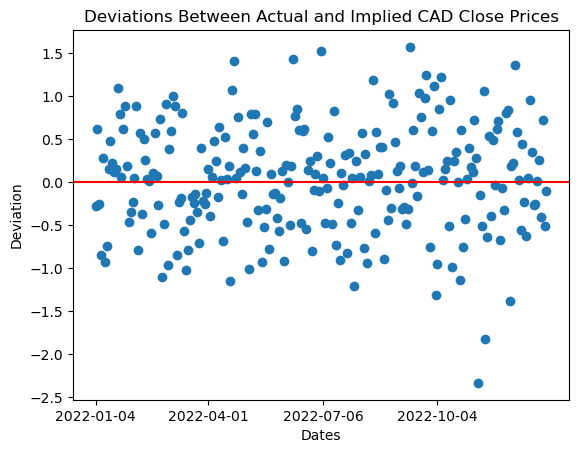

In [469]:
# Plotting the Deviations on a scatter plot
plt.scatter(Implied_close.index, Implied_close['Deviation']) # Scatter Plot
plt.axhline(y=0, color = 'r') # Horizontal line at 0 
plt.title('Deviations Between Actual and Implied CAD Close Prices') # title
plt.xlabel('Dates') # x axis label
plt.ylabel('Deviation') # y axis label
plt.xticks(custom_dates) 

The horizontal line is considered a reference point on the scatter plot where the actual cad price is the same as the implied CAD price. It helps easily show the positive and negative deviations. Points above the red line show days where the actual CAD price is higher than the implied (positive deviation) while points below show days where the actual price is lower than the implied. The plot shows a relatively balanced spread of points above and below the line showing that on average the CAD price is around the implied price. There are areas with large deviations, positive and negative, but they are not that extreme in either direction. There are 2 deviations past approximately -2.0 which could be considered slightly extreme but it does not represent the majority of the data. 

In [37]:
%%latex
\newpage

<IPython.core.display.Latex object>

### d) 
Based on parts (a) – (c), what conclusions can you make about the implied vs. actual closing price?  Overall, what conclusions can you draw about the pricing of your stock in the Canadian versus US market? **Refer to calculations and illustrations above!**

With the standard deviation and mean being generally small, the actual closing price on average is very close to the implied closing price. From the scatter plot, most of the points are close to the red line with deviations between -1.5 to 1.5 CAD which shows minor day to day fluctuations. This means the stock pricing across the Canadian and American markets are relatively stable. These calculations show that the differences between the implied and actual price can be attributed to the fluctuations in the exchange rate and not necessarily to pricing inefficiencies. Overall the stock pricing between Canadian and US markets is highly efficiecnt with the exchange rate variations being the main reason there are minor deviations in the data. 

In [40]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q5

### a)

Imagine that you can **simultaneously** purchase and sell up to $100000$ shares of your stock on either side of the market every trading day during this 1 year period **without** compounding and reinvesting (i.e., the amount of shares you can buy and sell each day does not change). You can buy fractional shares if you wish.


Calculate how much money in total you would make in USD.

In [473]:

# number of shares
shares = 100000

# making a copy of data frame to manipulate
trading_profit = Implied_close.copy()

# Difference in price 
trading_profit['Difference'] = trading_profit['Deviation'].abs()

# profit per day 
trading_profit['Profit CAD'] = trading_profit['Difference'] * shares

# Converting Canadian profit to USD
trading_profit['Profit USD'] = trading_profit['Profit CAD'] * trading_profit['exchange rate'] 

# Sum of all profits in USD
total_profit_USD = trading_profit['Profit USD'].sum()

# print sum
print(total_profit_USD)


9353762.73302354


I could make a total of $9353762.73302354 USD. 

In [43]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b)

Now imagine that there isn't a share restriction.  Instead, you are permitted to purchase up to \\$1 million CAD in shares on either side of the market at the beginning of this one year period.  Each period, if you make a profit, that profit can be used to increase the value of shares that you can purchase (e.g., if you make a profit of \\$20000 CAD in the first period, you can then purchase \$1.02 million CDN in the next period).    The following are the rules:

* Assume that you can buy/sell immediately
* There is a **constant** trading fee of $500 CAD per trade on the **canadian side** (yes, clearly this is crazy expensive!)
* A trading fee of **0.05% of the cost of each share** on the **american side** (the fee is 0.05% of the price in USD)
* You **cannot** buy fractional shares (round down).
* You must reinvest and compound your earnings.

Explain how you could make the most profit in the one year period.

After finding out that prices are slightly different on each side of the border, we can compare the close prices each day to see which side we should buy and sell in. Specifically, since we have $1 million in CAD, we should convert the USD close price to CAD using the exchange rate and then directly compare which one is cheaper. If the actual Cad price is cheaper, we would buy that and sell on the american side. If the implied CAD price is cheaper, we would buy on the american side and sell on the Canadian side. Then we would add our profits to our total investment fund and continue each day of the time period. However we also have to take into account the fees. Each day, if the potential profits are greater than the fees we would pay, we would execute the trade. If the fees exceed the profits, we would not trade on that day. We would have to consider fees both when buying and selling. This way we maximize our profits each day by not investing on days where we would lose money and optimizing our trades depending on the closing prices in Canada versus the USA. 

In [45]:
%%latex
\newpage

<IPython.core.display.Latex object>

### c)

Implement your strategy from part b) and determine your total profit.  Did you get rich?

In [423]:
starting_cash = 1000000 # money we are starting out with 
cash = 1000000 # money that we will invest each day
profit_earned = 0 # total profit earned starting at day 0
fee_CAD = 500 # fee for each Canadian transaction (buy or sell)
fee_USD = 0.0005 # fee for each American share that is transacted (buy or sell)

# First for loop for the days where we would buy the American stock since Implied < actual 
for i in range(len(trading_profit)):
    if trading_profit['CAD actual value'].iloc[i] > trading_profit['CAD Implied close price'].iloc[i]: # checks if implied closing price is less than actual CAD closing price
        shares = cash // (trading_profit['CAD Implied close price'].iloc[i] + (trading_profit['USD Close price'].iloc[i] * fee_USD) / trading_profit['exchange rate'].iloc[i]) # buys shares by dividing cash by the USD stock in CAD and adding the american transaction fee 
        profit_earned = shares * trading_profit['Difference'].iloc[i] - fee_CAD # we multiply the shares by the difference in price and subtract the canadian transaction fee
        if profit_earned > 0: # if the profit is greater than 0 then we should execute the trade 
            cash += profit_earned # the profit is added to our cash to invest the next time around 

    elif trading_profit['CAD actual value'].iloc[i] < trading_profit['CAD Implied close price'].iloc[i]: # checks if the Actual closing price is less than the implied closing price
        shares = (cash - fee_CAD) // trading_profit['CAD actual value'].iloc[i] # subtracts canadian transaction fee and gets the number of whole canadian shares
        profit_earned = shares * trading_profit['Difference'].iloc[i] - ((shares * trading_profit['USD Close price'].iloc[i] * fee_USD) / trading_profit['exchange rate'].iloc[i]) # Multiply shares by the difference in price and subtract the american trading fee

        if profit_earned > 0: # if profit is greater than 0 then the trade is executed 
            cash += profit_earned # profit is added to the total cash balance 

print(cash-starting_cash) # Final profit is printed 

1514464.4025889658


The total profit is $1514464.4025889658 CAD. Yes we got very rich. Approximately earned a 151% return over the 1 year time period. 

In [426]:
%%latex
\newpage

<IPython.core.display.Latex object>